In [14]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline
from sklearn import datasets,linear_model

In [15]:
dataset = pd.read_csv('Power_Data.csv')

In [16]:
dataset.describe()

,A_kWh,B_kWh,C_kWh,weekday
count,900.000000,900.000000,900.000000,901.0
mean,-3.300000,942.793333,576.100000,1.0
std,2.986622,447.132231,264.693251,0.0
min,-6.000000,120.000000,78.000000,1.0
25%,-6.000000,594.000000,367.500000,1.0
50%,-6.000000,1218.000000,735.000000,1.0
75%,0.000000,1291.500000,780.000000,1.0
max,0.000000,1476.000000,876.000000,1.0


In [17]:
dataset.isnull().any()

DateTime    False
A_kWh        True
B_kWh        True
C_kWh        True
weekday     False
dtype: bool

In [18]:
dataset = dataset.dropna()

In [19]:
dataset.head(5)

,DateTime,A_kWh,B_kWh,C_kWh,weekday
0,2019/10/14 05:00,0.0,120.0,84.0,1
1,2019/10/14 05:01,0.0,126.0,90.0,1
2,2019/10/14 05:02,0.0,120.0,90.0,1
3,2019/10/14 05:03,0.0,120.0,96.0,1
4,2019/10/14 05:04,0.0,120.0,114.0,1


In [27]:
dataset["mincount"]= range(len(dataset))

In [28]:
dataset.head(5)

,DateTime,A_kWh,B_kWh,C_kWh,weekday,mincount
0,2019/10/14 05:00,0.0,120.0,84.0,1,0
1,2019/10/14 05:01,0.0,126.0,90.0,1,1
2,2019/10/14 05:02,0.0,120.0,90.0,1,2
3,2019/10/14 05:03,0.0,120.0,96.0,1,3
4,2019/10/14 05:04,0.0,120.0,114.0,1,4


In [29]:
x=dataset[['mincount']]
y=dataset[['C_kWh']]

In [30]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=20170816)

In [31]:
from sklearn import datasets,linear_model
from sklearn.preprocessing import PolynomialFeatures

In [32]:
regr=linear_model.LinearRegression()

y=ax+b coef: [[0.00164774]]
y=ax+b bintercept: [575.81664015]
R square= 2.5684397321201757e-06


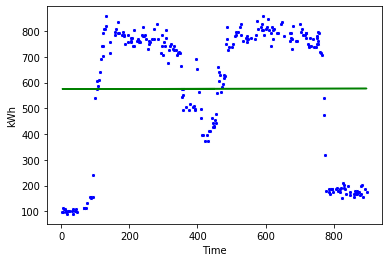

In [38]:
regr.fit(x_train,y_train)   

r_squared = regr.score(x_train, y_train)

print('y=ax+b coef:',regr.coef_)
print('y=ax+b bintercept:',regr.intercept_ )
print('R square=',r_squared)

plt.scatter(x_test,y_test,color='blue',marker='x',s=5)
plt.plot(x_test,regr.predict(x_test),color='green')
plt.xlabel('Time')
plt.ylabel('kWh')
plt.show()

Cofficients: [[ 0.00000000e+00  9.35916632e-04  9.31523582e-02 -5.97315027e-04
   1.45763664e-06 -1.55293997e-09  6.03951428e-13]]
intercept [-9.27122203]


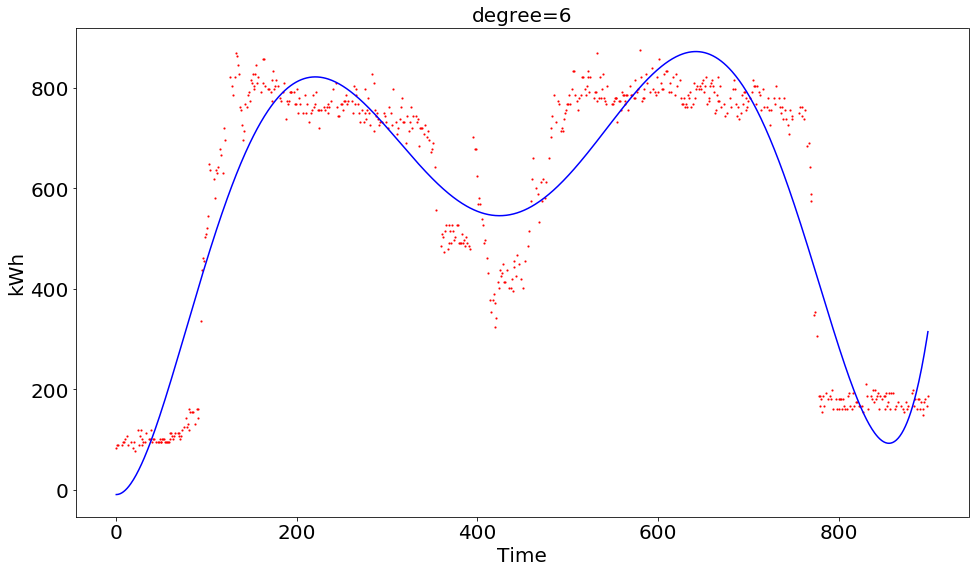

In [44]:
plt.figure(figsize=(16,9)) 
datasets_X=x_train
datasets_Y=y_train

minX =min(datasets_X)
maxX =max(datasets_X)

X=np.arange(0,900).reshape([-1,1])

poly_reg =PolynomialFeatures(degree=6)
X_ploy =poly_reg.fit_transform(datasets_X)
lin_reg_2=linear_model.LinearRegression()
lin_reg_2.fit(X_ploy,datasets_Y)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)


print('Cofficients:',lin_reg_2.coef_)

print('intercept',lin_reg_2.intercept_)

plt.scatter(datasets_X,datasets_Y,color='red',linewidth=0.1,s=4)
plt.plot(X,lin_reg_2.predict(poly_reg.fit_transform(X)),color='blue')
plt.xlabel('Time',size=20)
plt.ylabel('kWh',size=20)
plt.title("degree=6",size=20)
plt.show()